In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("D:\my files\Kaggle Data\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.shape

(1338, 7)

In [3]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
req_cols = ["sex","region","smoker"]
for cols in req_cols:
    df[cols]=df[cols].astype("category")
    df[cols]=df[cols].cat.codes
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [6]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


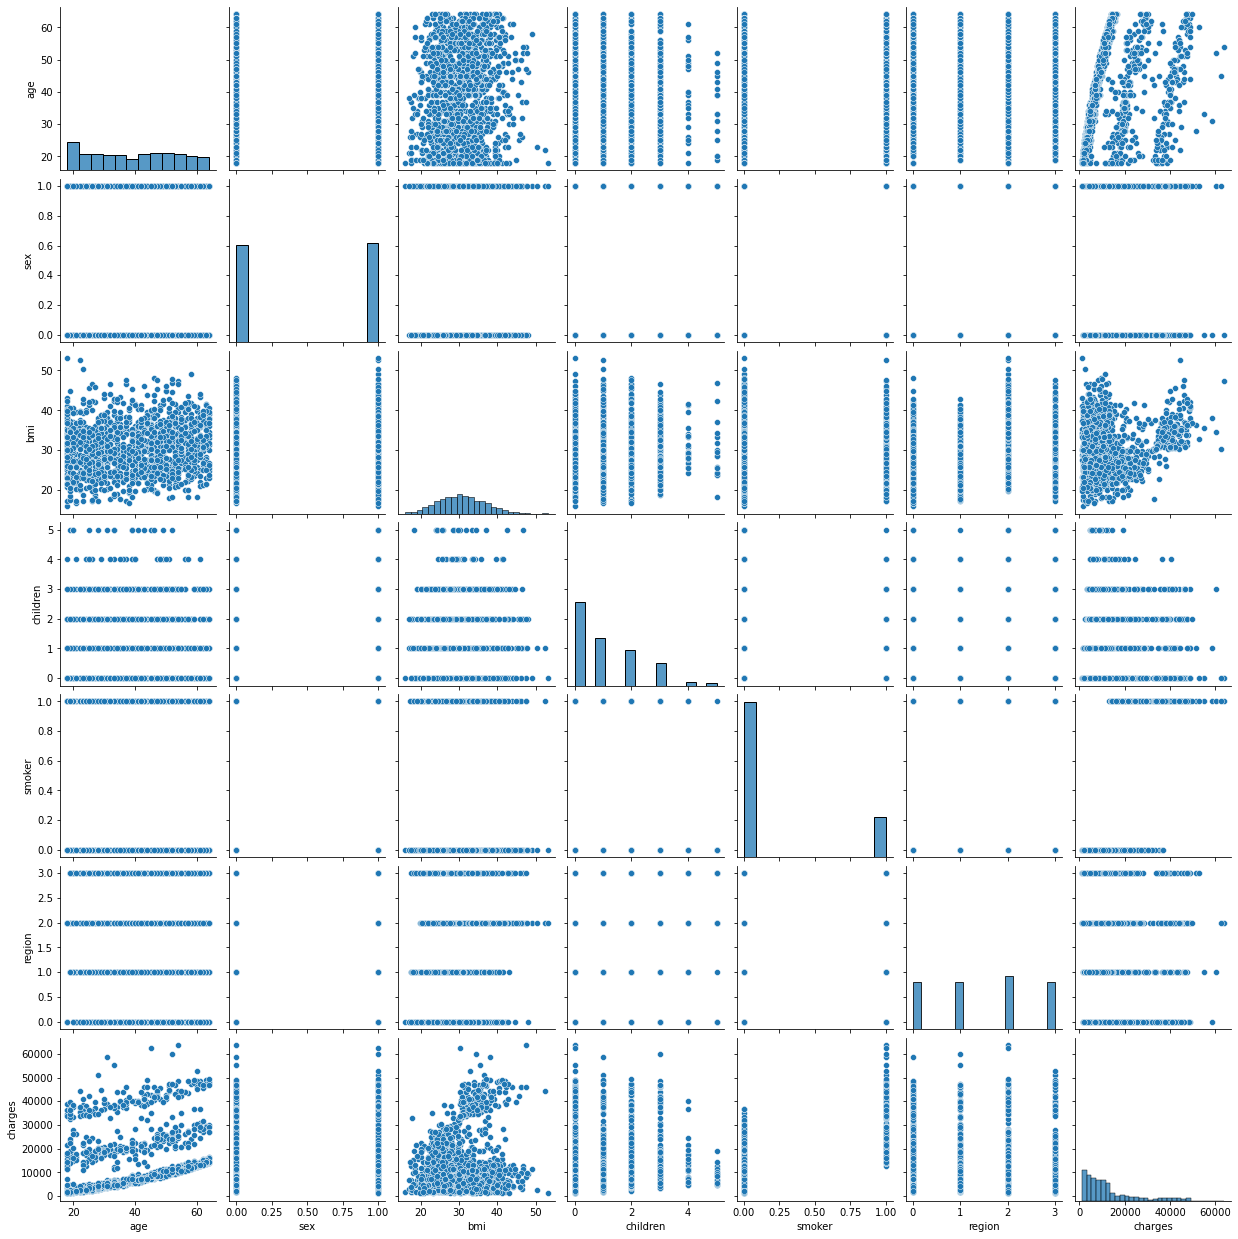

In [7]:
sns.pairplot(df)

<AxesSubplot:>

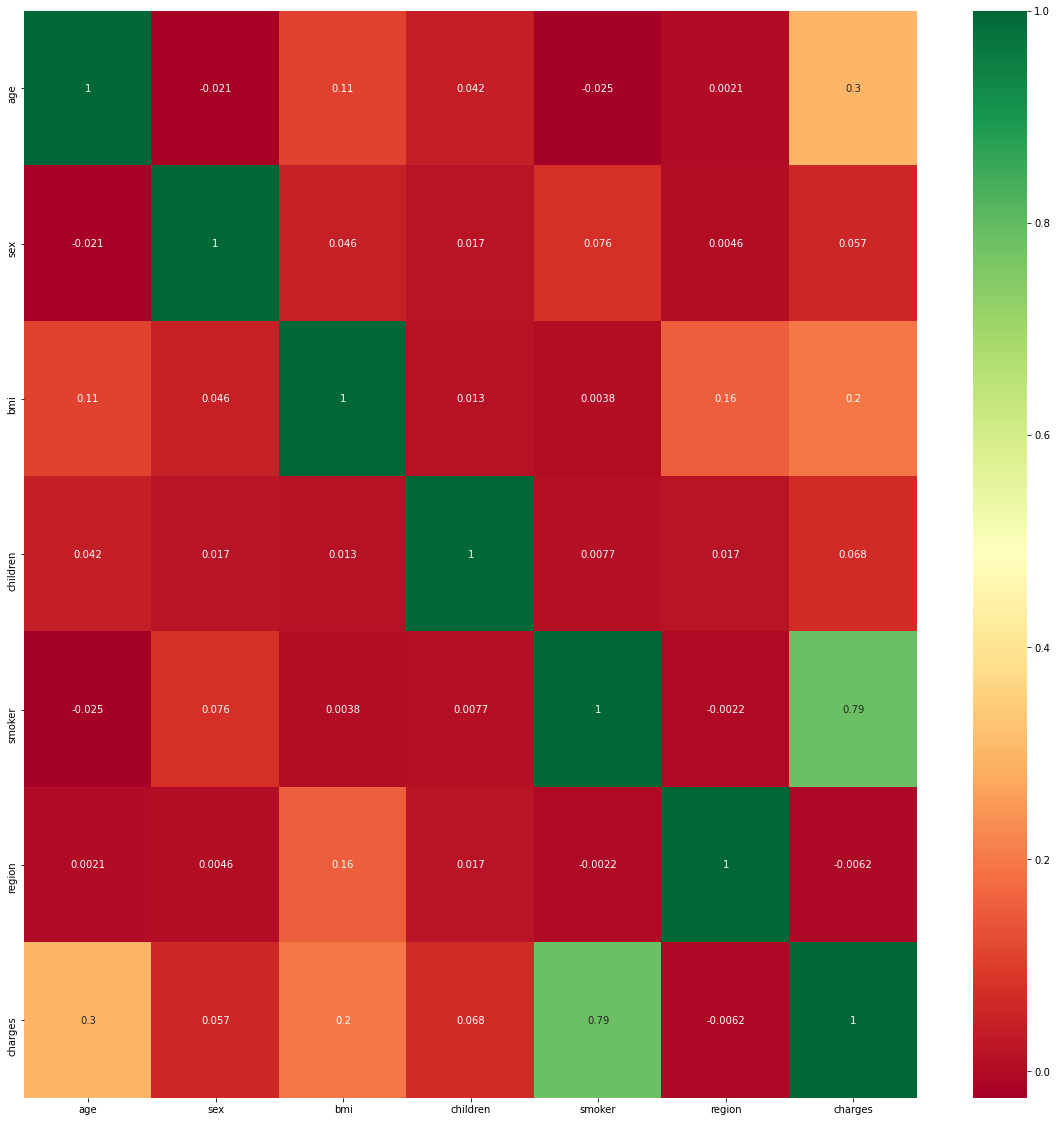

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [9]:
df.iloc[:,:-1].corr()

,age,sex,bmi,children,smoker,region
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000


In [10]:
df.drop("region",inplace=True,axis=1)
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [11]:
X = df.iloc[:,:-1]
y = df["charges"]
X.shape

(1338, 5)

In [12]:
y.shape

(1338,)

In [13]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
outlier = lof.fit_predict(X)
outlier[0:5]

array([1, 1, 1, 1, 1])

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape

(1070, 5)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
                     ("std scaler",StandardScaler())
                               ])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm_model = lm.fit(X_train,y_train)
print(lm.intercept_)
print(lm.coef_)

13201.182056009347
[3590.14587504  -11.7265853  1983.03767949  521.22290056 9517.28434925]


In [18]:
pred = lm.predict(X_test)
pred

array([ 1.14487064e+04,  9.93122532e+03,  3.77727178e+04,  1.59357390e+04,
        6.88997647e+03,  3.59863726e+03,  1.12708165e+03,  1.40623170e+04,
        8.76765597e+03,  7.23372702e+03,  4.15287454e+03,  1.01167075e+04,
        9.08138366e+03,  4.30837572e+03,  2.76879360e+04,  1.11696620e+04,
        1.11718384e+04,  5.55433485e+03,  8.00873212e+03,  2.66039850e+04,
        3.34802407e+04,  1.40836906e+04,  1.12578208e+04,  3.25955729e+04,
        4.51420381e+03,  8.63780775e+03,  7.82347089e+02,  1.01722949e+04,
        4.25706263e+03,  1.01894544e+04,  8.79010666e+03,  4.03307822e+04,
        1.58764118e+04,  1.40596765e+04,  2.43874022e+04,  4.70442876e+03,
        1.29057280e+04,  3.09071751e+04,  3.32583543e+04,  3.87702917e+03,
        3.64454374e+03,  4.42922762e+03,  3.00771143e+04,  3.91645377e+04,
        2.80946107e+04,  4.79477036e+03,  1.10638332e+04,  7.65328998e+03,
        3.21588852e+03,  1.07522110e+04,  5.14377109e+03,  3.19238184e+03,
        3.33123966e+04,  

<AxesSubplot:xlabel='charges', ylabel='Density'>

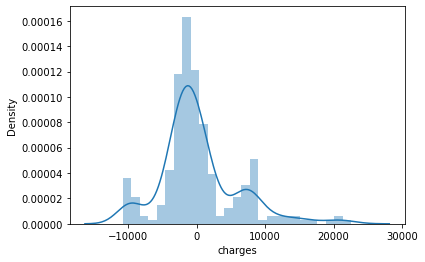

In [19]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(y_test-pred)

In [20]:
from sklearn.metrics import r2_score,mean_squared_error
r_score = r2_score(y_test,pred)
r_score

0.7978644236809905

In [21]:
rmse = np.sqrt(mean_squared_error(y_test,pred))
rmse

5671.492452926753

In [28]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=33)
knn_model = knn.fit(X_train,y_train)
pred2 = knn.predict(X_test)
pred2


array([11146.89158667, 10362.73848697, 42640.43301333, 12006.69994152,
       12542.35811364,  4987.17945909,  4486.8875503 , 14272.74443545,
        7753.18349485,  6468.01949818,  7536.7706703 , 12181.88898152,
        8707.69980303,  4980.10292303, 24896.68616152, 11557.74089879,
       12803.15237364,  6175.30577121,  8156.82639364, 25754.82069485,
       28084.90106727, 14290.65744515, 11770.52689121, 29655.46992879,
        3479.7608703 ,  7527.70690364,  4552.83135545,  9497.89184727,
        5118.90066091, 10662.11951212,  8539.56397818, 43273.77006879,
       12287.25461576, 11502.73275515, 20986.50936515,  4504.33261121,
       10283.99839606, 36437.86387788, 33796.17190394,  3125.70731061,
        5155.15670848,  3676.28185636, 26360.48466242, 42851.22472333,
       33682.25829273,  6817.95780182, 11549.07410636,  7202.03031576,
        6221.37378848, 13753.67035394,  2966.15346364,  7509.38972879,
       32695.05716909, 40038.91141818, 11529.63740545,  4606.8035197 ,
      

<AxesSubplot:xlabel='charges', ylabel='Density'>

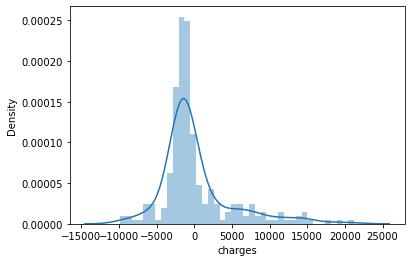

In [29]:
sns.distplot(y_test-pred2)

In [30]:
r_score = r2_score(y_test,pred2)
r_score

0.8585062049682252

In [31]:
rmse = np.sqrt(mean_squared_error(y_test,pred2))
rmse

4745.092440850957

In [32]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=52)
dt_model = dt.fit(X_train,y_train)
pred3 = dt.predict(X_test)
pred3

array([10797.3362  ,  8930.93455 , 44202.6536  , 13143.86485 ,
        9264.797   ,  7228.21565 ,  1615.7667  , 10381.4787  ,
        7151.092   ,  5325.651   ,  4766.022   , 30284.64294 ,
        7633.7206  ,  4571.41305 , 35147.52848 , 10264.4421  ,
       12323.936   ,  3877.30425 ,  6455.86265 , 33907.548   ,
       24869.8368  , 12269.68865 ,  9625.92    , 24915.22085 ,
       11482.63485 ,  4462.7218  ,  2680.9493  ,  7954.517   ,
        3645.0894  ,  8825.086   ,  7954.517   , 47896.79135 ,
       13981.85035 , 10226.2842  , 14455.64405 , 13126.67745 ,
        8733.22925 , 37165.1638  , 38415.474   ,  2207.69745 ,
        5116.5004  , 13126.67745 , 21082.16    , 49577.6624  ,
       36219.40545 ,  3579.8287  , 11015.1747  ,  6389.37785 ,
        4719.52405 , 11830.6072  ,  2473.3341  , 22493.65964 ,
       24915.22085 , 46661.4424  , 11856.4115  ,  3366.6697  ,
        2727.3951  ,  8782.469   ,  8606.2174  , 12913.9924  ,
        1635.73365 , 46130.5265  , 14590.63205 , 25333.

<AxesSubplot:xlabel='charges', ylabel='Density'>

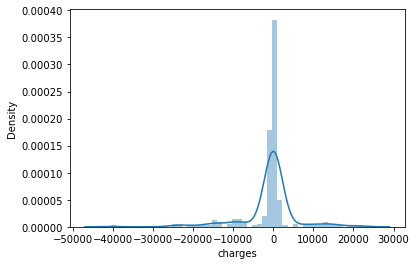

In [33]:
sns.distplot(y_test-pred3)

In [34]:
r_score = r2_score(y_test,pred3)
r_score

0.7197650964183935

In [35]:
rmse = np.sqrt(mean_squared_error(y_test,pred3))
rmse

6677.856665748789

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=35)
rf_model = rf.fit(X_train,y_train)
pred4 = rf.predict(X_test)
pred4

array([11035.85613571,  9981.36415086, 44355.07975714, 13010.45978143,
        9176.83170714, 11919.87178429,  1839.42407429, 10985.48210971,
        7954.33007371,  5144.65546   ,  6919.66750514, 14841.30144914,
       10394.53695343,  4432.2029    , 26496.16180743, 11654.81550943,
       13277.15871371,  6750.71909086,  6944.22316314, 33884.08738   ,
       23886.19303857, 12552.32104714, 11327.77150114, 28278.36894857,
        3834.89523914,  4096.51415571,  6048.66967943,  7967.52395143,
        3661.46937143,  8870.98783257,  8081.67917229, 48372.72506086,
       13999.33432286, 11328.55493171, 15543.34484114,  3889.81283857,
        9097.65606886, 37903.93604371, 39486.61590143,  3174.184406  ,
        9605.966118  ,  3819.900758  , 20686.16103943, 47645.362     ,
       36958.65087571,  3794.32625171, 12147.16290514,  6635.38909571,
        4492.52594714, 13381.88822457,  3315.82519857, 12974.16057171,
       27150.78522   , 48654.91867457, 11773.05905286,  6912.56228886,
      

<AxesSubplot:xlabel='charges', ylabel='Density'>

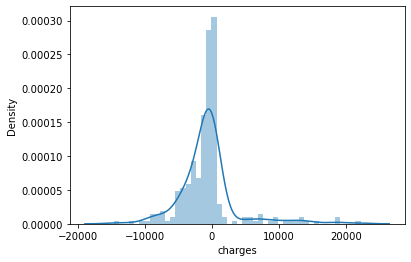

In [37]:
sns.distplot(y_test-pred4)

In [38]:
r_score = r2_score(y_test,pred4)
r_score

0.8780072132680541

In [39]:
rmse = np.sqrt(mean_squared_error(y_test,pred4))
rmse

4405.985423968816

In [43]:
from sklearn.svm import SVR
svm = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_model = svm.fit(X_train,y_train)
svm_model

SVR(C=1000000, epsilon=0.001)

In [45]:
pred5 = svm.predict(X_test)
pred5

array([10249.36178773,  8708.54446614, 44650.26747129, 12760.6326461 ,
        9035.07890527,  3850.62306179,  1896.27898713, 11345.36784604,
        7078.70951446,  5050.2366159 ,  6643.06870827, 10251.56719908,
        7348.34282583,  4641.39497032, 20583.50998682, 10733.00829213,
       12571.55570842,  3197.12139154,  6463.2463407 , 25070.61595557,
       21789.5596717 , 12782.7013329 , 10050.07114001, 25102.16451172,
        1719.34484774,  4163.32641024,  3167.46852601,  7619.65971288,
        4156.77165671,  8460.69666773,  7634.71252306, 47923.93129192,
       13265.08547657, 10313.46730976, 18854.50495847,  3790.24919062,
        8297.81301336, 38220.22800619, 36213.39713541,  2234.66206406,
        4945.10662276,  3165.34820578, 24360.9713523 , 49182.06004703,
       42758.34869514,  3632.00160379, 10771.93088432,  6888.48322632,
        4496.14109723, 12404.10162577,  2503.24585153,  3715.78051629,
       29702.63882862, 46430.57567225, 11811.79760713,  2710.80985993,
      

<AxesSubplot:xlabel='charges', ylabel='Density'>

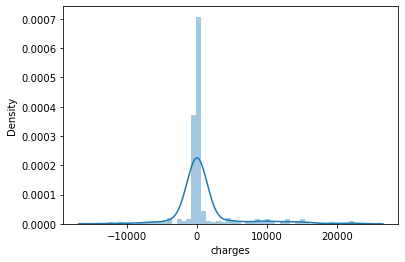

In [46]:
sns.distplot(y_test-pred5)

In [47]:
r_score = r2_score(y_test,pred5)
r_score

0.8811032881677625

In [48]:
rmse = np.sqrt(mean_squared_error(y_test,pred5))
rmse

4349.715999245075

<AxesSubplot:>

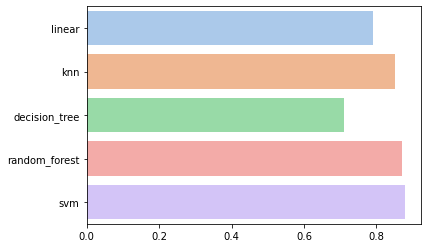

In [54]:
model = ["linear","knn","decision_tree","random_forest","svm"]
score = [0.79,0.85,0.71,0.87,0.88]
sns.barplot(x=score,y=model,palette="pastel")

In [ ]:
# svm model is predicted well